# 1. Dataset for emotion prediction

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

'0': sadness
               '1': joy
               '2': love
               '3': anger
               '4': fear
               '5': surprise

In [10]:
#!pip install datasets

In [11]:
from datasets import load_dataset
dataset = load_dataset('json', data_files={'train': 'train.jsonl','test':'validation.jsonl'})

c:\Users\vadim\OneDrive\Desktop\inter\.venv\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
#!py -m pip install nltk

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vadim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accepted', 'aching', 'actually', 'admit',
       'afraid', 'agitated', 'ago', 'almost', 'alone', 'already', 'also',
       'always', 'amazed', 'amazing', 'amp', 'angry', 'annoyed',
       'another', 'anxious', 'anymore', 'anyone', 'anything',
       'apprehensive', 'around', 'ashamed', 'ask', 'asked', 'assured',
       'away', 'awful', 'awkward', 'baby', 'back', 'bad', 'beaten',
       'beautiful', 'become', 'bed', 'began', 'believe', 'beloved',
       'best', 'better', 'big', 'bit', 'blessed', 'blog', 'body', 'book',
       'bothered', 'brave', 'burdened', 'call', 'calm', 'came', 'cannot',
       'cant', 'care', 'caring', 'cause', 'certain', 'change', 'child',
       'children', 'class', 'close', 'cold', 'come', 'comes',
       'comfortable', 'coming', 'completely', 'confident', 'confused',
       'content', 'control', 'convinced', 'cool', 'could', 'couldnt',
       'cranky', 'creative', 'curious', 'cute', 'dangerous', 'day',
       'days', 'decided', 'de

In [16]:
X_train_vec[:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
X_train_vec[:1].toarray().sum()

np.int64(2)

In [18]:
dataset['train']['text'][:1]

['i didnt feel humiliated']

In [19]:
vocabulary = vectorizer.get_feature_names_out()

In [20]:
len(vocabulary)

500

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
tfidf = TfidfTransformer()

In [23]:
X_train_idf = tfidf.fit_transform(X_train_vec)

In [24]:
X_train_idf[:1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [25]:
X_train_idf[:1].toarray().sum()

np.float64(1.2295066506768701)

In [26]:
X_test_vec = vectorizer.transform(dataset['test']['text'])

In [27]:
X_test_idf = tfidf.transform(X_test_vec)

In [28]:
X_test_idf[:1].toarray().sum()

np.float64(2.52371815232768)

In [29]:
X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

In [30]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
X_train, X_test, y_train, y_test = X_train,X_test,dataset['train']['label'],\
                            dataset['test']['label']

# 2. AdaBoost

In [33]:
# обучение на объектах, неверно классифицированных на предыдущем шаге

In [34]:
cur_tree = DecisionTreeClassifier(random_state=42, max_depth = 6)
abc = AdaBoostClassifier(estimator = cur_tree,n_estimators=100,
                                 learning_rate=1.0) # DecisionTreeClassifier <-default
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

c:\Users\vadim\OneDrive\Desktop\inter\.venv\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.5605


In [ ]:
import pickle

filename = "models/AdaBoost_100_6.pickle"
pickle.dump(model, open(filename, "wb"))

# 3. GradientBoosting

In [ ]:
# обучение в направлн

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100,
                                         max_depth = 6, random_state=42)

model = gbc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9066666666666666


In [ ]:
filename = "models/GBC_100_6.pickle"

pickle.dump(model, open(filename, "wb"))
#loaded_model = pickle.load(open(filename, "rb"))

In [43]:
X_train_0, X_train_1, y_train_0, y_train_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# 3. Blending

In [44]:
from sklearn.ensemble import RandomForestClassifier

N = 10
y_pred_1 = []
crf = []
for n in range(1,N+1):
    crf.append(RandomForestClassifier(n_estimators = 2,max_depth=2, random_state=n))
    crf[-1].fit(X_train_0,y_train_0)
    y_pred_1.append(crf[-1].predict(X_train_1).reshape(len(X_train_1),1)) 
    y_pred_1t = np.array(y_pred_1).transpose()[0]
# y_pred_1 = hstack(y_pred_1)
len(y_pred_1t[0])

10

In [45]:
y_pred_1t = np.array(y_pred_1).transpose()[0]
#y_pred_1 = hstack(y_pred_1)
len(y_pred_1t[0])

10

In [46]:
len(y_pred_1t)

231

In [47]:
clf_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [48]:
clf_final.fit(y_pred_1t,y_train_1)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [49]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_blending_prediction(crf,clf_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.77

In [50]:
metrics.accuracy_score(y_test, crf[0].predict(X_test))

0.7433333333333333

# 4. Stacking

In [51]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier

N = 10
y_pred_1 = []
crf_stack = []
kf = KFold(n_splits=N, random_state=None, shuffle=False)

x_test_2 = []
y_test_2 = []

pre_prediction = np.zeros((len(X_train), N))

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]
    
    crf_stack.append(RandomForestClassifier(n_estimators = 2,max_depth=2, random_state=i))
    crf_stack[-1].fit(X_train_0,y_train_0)
    pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

In [52]:
clf_stack_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [53]:
clf_stack_final.fit(pre_prediction,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [54]:
def make_stacking_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.52

In [55]:
metrics.accuracy_score(y_test, crf_stack[0].predict(X_test))

0.75

In [56]:
# Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
# Визуализировать графики зависимости предсказания от параметров модели.

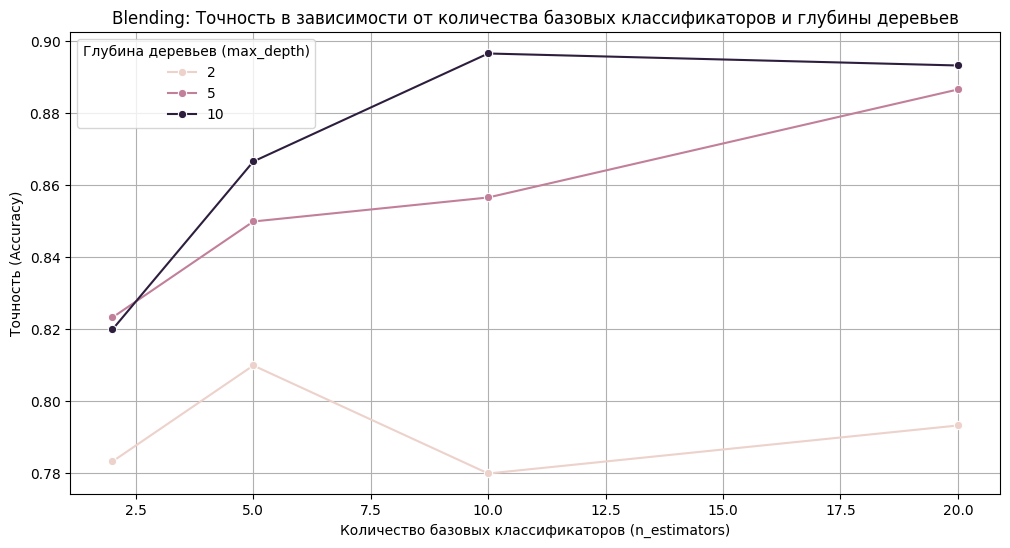

In [68]:
def train_and_evaluate_blending(X_train, y_train, X_test, y_test, n_estimators_range, max_depth_range):
    results = []
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            crf = [
                RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=i)
                for i in range(1, 6)
            ]
            for clf in crf:
                clf.fit(X_train, y_train)

            y_pred_intermediate = np.array([clf.predict(X_train) for clf in crf]).T
            final_clf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
            final_clf.fit(y_pred_intermediate, y_train)

            y_test_pred = make_blending_prediction(crf, final_clf, X_test)
            accuracy = accuracy_score(y_test, y_test_pred)
            results.append((n_estimators, max_depth, accuracy))
    return results

n_estimators_range = [2, 5, 10, 20]
max_depth_range = [2, 5, 10]

results_blending = train_and_evaluate_blending(X_train, y_train, X_test, y_test, n_estimators_range, max_depth_range)

results_blending_df = pd.DataFrame(results_blending, columns=['n_estimators', 'max_depth', 'accuracy'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_blending_df, x='n_estimators', y='accuracy', hue='max_depth', marker='o')
plt.title('Blending: Точность в зависимости от количества базовых классификаторов и глубины деревьев')
plt.xlabel('Количество базовых классификаторов (n_estimators)')
plt.ylabel('Точность (Accuracy)')
plt.legend(title='Глубина деревьев (max_depth)')
plt.grid()
plt.show()



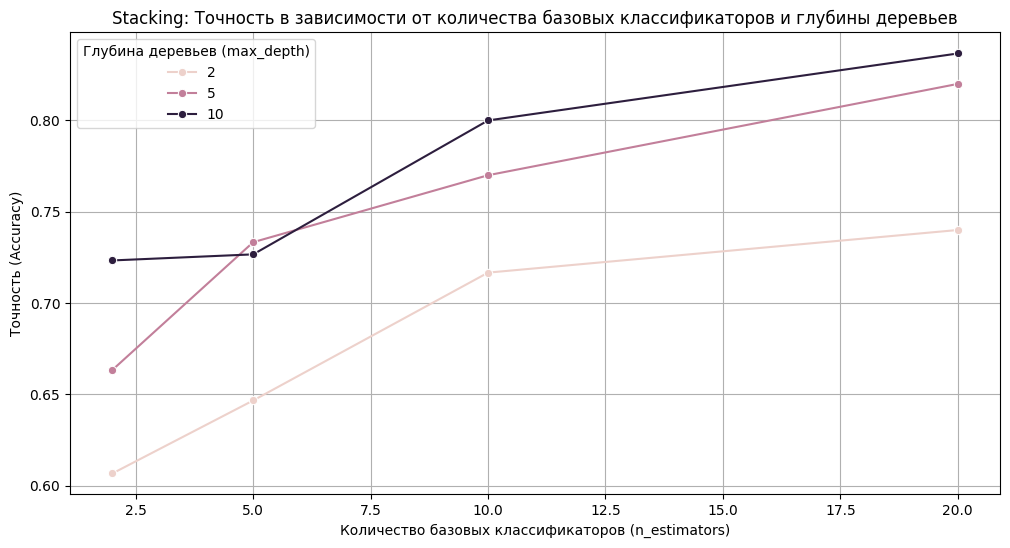

In [67]:
from sklearn.model_selection import KFold

def train_and_evaluate_stacking(X_train, y_train, X_test, y_test, n_estimators_range, max_depth_range, n_splits=5):
    results = []
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            crf_stack = []
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
            
            pre_prediction = np.zeros((len(X_train), n_splits))
            
            for i, (train_index, test_index) in enumerate(kf.split(X_train)):
                X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
                y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]
                
                clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=i)
                clf.fit(X_train_0, y_train_0)
                crf_stack.append(clf)
                pre_prediction[test_index, i] = clf.predict(X_test_1)

            clf_stack_final = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
            clf_stack_final.fit(pre_prediction, y_train)

            y_test_pred = make_stacking_prediction(crf_stack, clf_stack_final, X_test)
            accuracy = accuracy_score(y_test, y_test_pred)
            results.append((n_estimators, max_depth, accuracy))
    return results

# Параметры для поиска
n_estimators_range = [2, 5, 10, 20]
max_depth_range = [2, 5, 10]

# Оптимизация Stacking
results_stacking = train_and_evaluate_stacking(X_train, y_train, X_test, y_test, n_estimators_range, max_depth_range)

# Преобразование в DataFrame для визуализации
results_stacking_df = pd.DataFrame(results_stacking, columns=['n_estimators', 'max_depth', 'accuracy'])

# Визуализация Stacking
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_stacking_df, x='n_estimators', y='accuracy', hue='max_depth', marker='o')
plt.title('Stacking: Точность в зависимости от количества базовых классификаторов и глубины деревьев')
plt.xlabel('Количество базовых классификаторов (n_estimators)')
plt.ylabel('Точность (Accuracy)')
plt.legend(title='Глубина деревьев (max_depth)')
plt.grid()
plt.show()
